**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
#fetch_mldata is dead
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
import scipy.spatial
from sklearn.neighbors import KDTree

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm = 'brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    def predict(self, X):
        if self.algorithm == 'brute':
            dists = scipy.spatial.distance.cdist(self.X_train, X, metric = self.metric) # считаем расстояния между элементами
            idx = np.argpartition(dists, self.n_neighbors, axis=0)[:self.n_neighbors] # получаем индексы k ближайших соседей k раз
        else:
            tree = KDTree(self.X_train, metric = self.metric)
            dists,idx = tree.query(X, self.n_neighbors)
        dists_near = self.y_train[idx] # матрица только с короткими дистанциями
        # далее применяем голосование по столбцам в случае brute или по строкам в случае 
        u = np.unique(dists_near, return_inverse=True) 
        if self.algorithm == 'brute':
            return u[0][np.argmax(np.apply_along_axis(np.bincount, 0, dists_near, None, np.max(u[1])+1), axis=0)]
        else:
            return u[0][np.argmax(np.apply_along_axis(np.bincount, 1, dists_near, None, np.max(u[1])+1), axis=1)]

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(n_neighbors=2)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 1.34 ms, sys: 987 µs, total: 2.33 ms
Wall time: 1.56 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 16 µs


MyKNeighborsClassifier(n_neighbors=2)

In [11]:
%time clf.predict(X_test)

CPU times: user 3.43 ms, sys: 2.08 ms, total: 5.51 ms
Wall time: 4.81 ms


array([0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 1.19 ms, sys: 868 µs, total: 2.06 ms
Wall time: 1.78 ms


array([0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 824 µs, sys: 188 µs, total: 1.01 ms
Wall time: 930 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 15.7 µs


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [17]:
%time clf.predict(X_test)

CPU times: user 3.46 ms, sys: 590 µs, total: 4.05 ms
Wall time: 4.69 ms


array([1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 976 µs, sys: 206 µs, total: 1.18 ms
Wall time: 1.02 ms


array([1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

Будет тяжело выбрать абсолютно все данные из словаря, но так как более важными являются редко встречаемые слова, зададим ограничения min_df=0.005, max_df=0.1

In [23]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.1, min_df=0.005)
vector = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [25]:
clf = MyKNeighborsClassifier(n_neighbors=5, algorithm='brute')

In [26]:
kf = KFold(3)
for train_ind, test_ind in kf.split(vector.toarray()):
    print("Train:", train_ind, "Test:", test_ind)
    X_train, X_test = vector.toarray()[train_ind], vector.toarray()[test_ind]
    y_train, y_test = target[train_ind], target[test_ind]
    clf.fit(X_train, y_train)
    print("My knn:", cross_validate(clf, X_test, y_test, scoring = 'accuracy')['test_score'])

Train: [ 3772  3773  3774 ... 11311 11312 11313] Test: [   0    1    2 ... 3769 3770 3771]
My knn: [0.18543046 0.2013245  0.20424403 0.19363395 0.18965517]
Train: [    0     1     2 ... 11311 11312 11313] Test: [3772 3773 3774 ... 7540 7541 7542]
My knn: [0.19735099 0.20689655 0.21485411 0.19363395 0.18169761]
Train: [   0    1    2 ... 7540 7541 7542] Test: [ 7543  7544  7545 ... 11311 11312 11313]
My knn: [0.19205298 0.20424403 0.20291777 0.21352785 0.19496021]


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [27]:
def neighbors_dict(vector, target, start, step, end, met = 'euclidean'):
    d = {}
    i = start
    while(i <= end):
        clf = MyKNeighborsClassifier(n_neighbors = i, algorithm='brute', metric = met)
        # строим словарь количество соседей : средний score на кросс валидации на 3 фолдах
        d[i] = np.mean(cross_val_score(clf, vector, target, scoring = 'accuracy', cv = 3))
        i += step
    return d

Находим количество соседей, соответствующее максимальному значению accuracy score

In [28]:
def best_number_neighbors(d):
    return max(d, key=d.get)

Рассмотрим количество соседей от 1 до 10:

In [29]:
dic = neighbors_dict(vector.toarray(), target, 1, 1, 10)
best_number_neighbors(dic)

1

Нарисуем зависимость среднего score от количества соседей при k от 1 до 10

In [30]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
def score_dependency(dic):
    fig = plt.figure(figsize= (14,5))
    ax1 = fig.add_subplot(111)
    values = list(dic.values())
    keys = list(dic.keys())
    plt.title("Score в зависимости от числа соседей", color = 'g')
    plt.xlabel("Количество соседей", color = 'b')
    plt.ylabel("Score", color = 'b')
    plt.grid()
    plt.plot(keys, values, color = 'r')

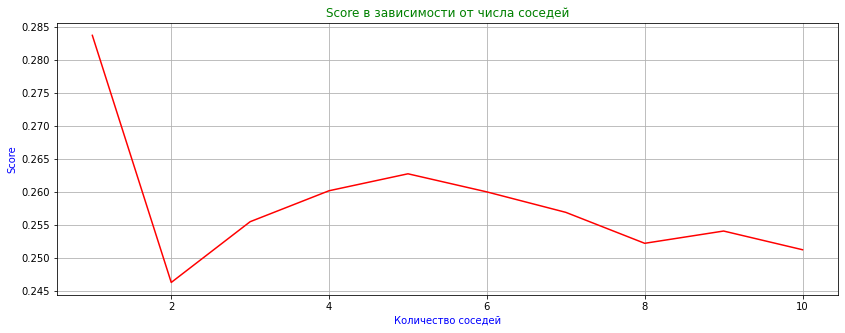

In [32]:
score_dependency(dic)

Попробуем рассмотреть другие k, например, 10, 20, ..., 100

In [33]:
dic = neighbors_dict(vector.toarray(), target, 10, 10, 100)
best_number_neighbors(dic)

10

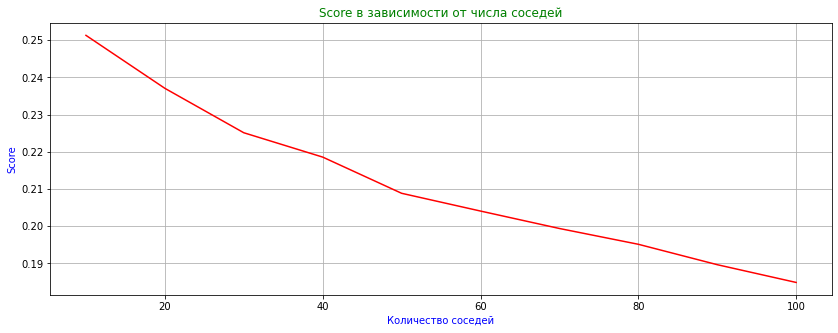

In [34]:
score_dependency(dic)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

1. Используем косинусную метрику:

Сначала рассмотрим количество соседей от 1 до 10:

In [35]:
dic = neighbors_dict(vector.toarray(), target, 1, 1, 10, met = 'cosine')
best_number_neighbors(dic)

10

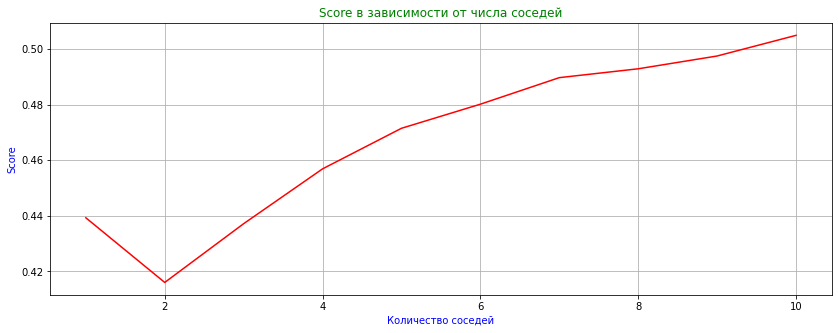

In [36]:
score_dependency(dic)

Изменилась метрика, стали заметны большие улучшения в score, попробуем также рассмотреть другие k:

In [37]:
dic = neighbors_dict(vector.toarray(), target, 10, 10, 200, met = 'cosine')
best_number_neighbors(dic)

100

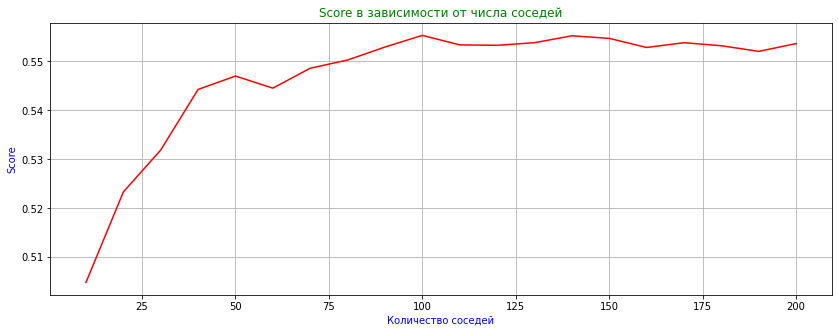

In [38]:
score_dependency(dic)

2. Применим TfIdf векторизацию к данным:

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer_second = TfidfVectorizer(stop_words='english', max_df=0.1, min_df=0.005)
vector_second = vectorizer_second.fit_transform(data)

Рассмотри k от 1 до 10:

In [41]:
dic = neighbors_dict(vector_second.toarray(), target, 1, 1, 10, met = 'cosine')
best_number_neighbors(dic)

10

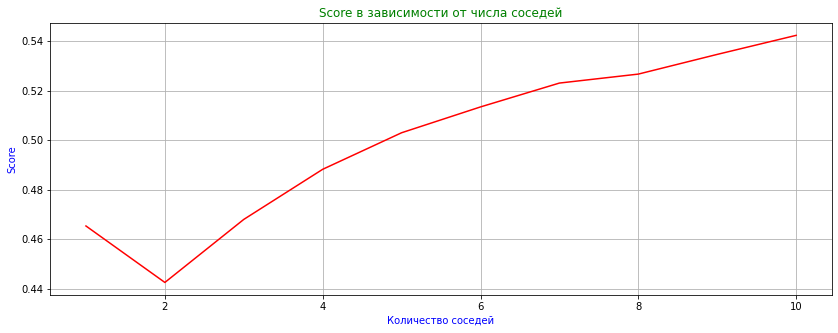

In [42]:
score_dependency(dic)

Результат относительно прошлого при k от 1 до 10 улучшился, тогда рассмотрим другие k:

In [43]:
dic = neighbors_dict(vector_second.toarray(), target, 10, 10, 200, met = 'cosine')
best_number_neighbors(dic)

120

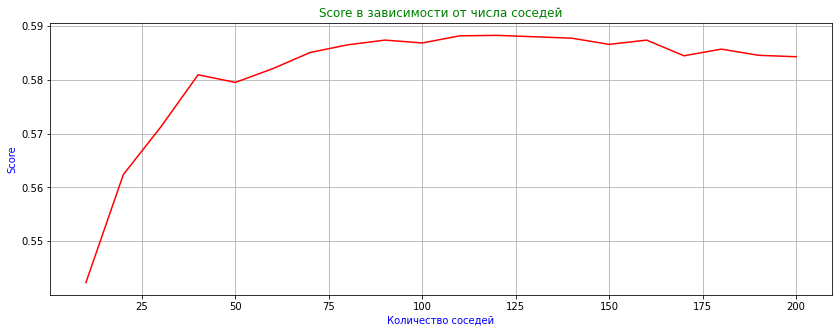

In [44]:
score_dependency(dic)

Еще большее увеличение результата. Получаем, что для train части лучше всего сработала модель с cosine метрикой, TfIdf векторизацией словаря и количеством соседей 120

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [45]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
data = newsgroups['data']
target = newsgroups['target']
vectorizer_third = TfidfVectorizer(stop_words='english', max_df=0.1, min_df=0.005)
vector_third = vectorizer_third.fit_transform(data)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [46]:
clf = MyKNeighborsClassifier(n_neighbors=120, algorithm='brute', metric = 'cosine')
np.mean(cross_val_score(clf, vector_third.toarray(), target, scoring = 'accuracy', cv = 3))

0.575677906983509

Точность модели на test части датасета снизилась, убедимся в этом.

Попробуем другие k:

In [47]:
dic = neighbors_dict(vector_third.toarray(), target, 1, 10, 200, met = 'cosine')
best_number_neighbors(dic)

121

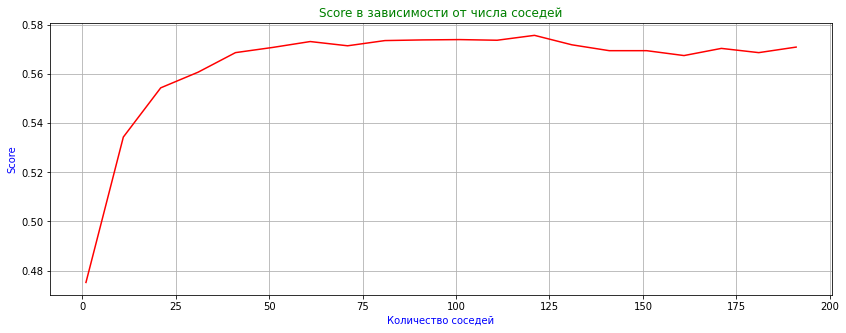

In [48]:
score_dependency(dic)

Скорее всего в test части есть информация, которая не учитывается в train части, поэтому результат на test меньше. Также возможно модель переобучается на train, что отрицательно влияет на итог test части.